Data Analysis

In [22]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset
file_path = r'C:\Kodilla\DataAnalysis\HRDataset.csv'
df = pd.read_csv(file_path)

# Display the first few rows of the dataset
df.head()

,Employee_Name,EmpID,MarriedID,MaritalStatusID,GenderID,EmpStatusID,DeptID,PerfScoreID,FromDiversityJobFairID,PayRate,...,Department,ManagerName,ManagerID,RecruitmentSource,PerformanceScore,EngagementSurvey,EmpSatisfaction,SpecialProjectsCount,LastPerformanceReview_Date,DaysLateLast30
0,"Brown, Mia",1.103024e+09,1.0,1.0,0.0,1.0,1.0,3.0,1.0,28.50,...,Admin Offices,Brandon R. LeBlanc,1.0,Diversity Job Fair,Fully Meets,2.04,2.0,6.0,1/15/2019,0.0
1,"LaRotonda, William",1.106027e+09,0.0,2.0,1.0,1.0,1.0,3.0,0.0,23.00,...,Admin Offices,Brandon R. LeBlanc,1.0,Website Banner Ads,Fully Meets,5.00,4.0,4.0,1/17/2019,0.0
2,"Steans, Tyrone",1.302053e+09,0.0,0.0,1.0,1.0,1.0,3.0,0.0,29.00,...,Admin Offices,Brandon R. LeBlanc,1.0,Internet Search,Fully Meets,3.90,5.0,5.0,1/18/2019,0.0
3,"Howard, Estelle",1.211051e+09,1.0,1.0,0.0,1.0,1.0,3.0,0.0,21.50,...,Admin Offices,Brandon R. LeBlanc,1.0,Pay Per Click - Google,Fully Meets,3.24,3.0,4.0,NaN,NaN
4,"Singh, Nan",1.307060e+09,0.0,0.0,0.0,1.0,1.0,3.0,0.0,16.56,...,Admin Offices,Brandon R. LeBlanc,1.0,Website Banner Ads,Fully Meets,5.00,3.0,5.0,1/15/2019,0.0


1. Dependency between direct supervisor and performance score

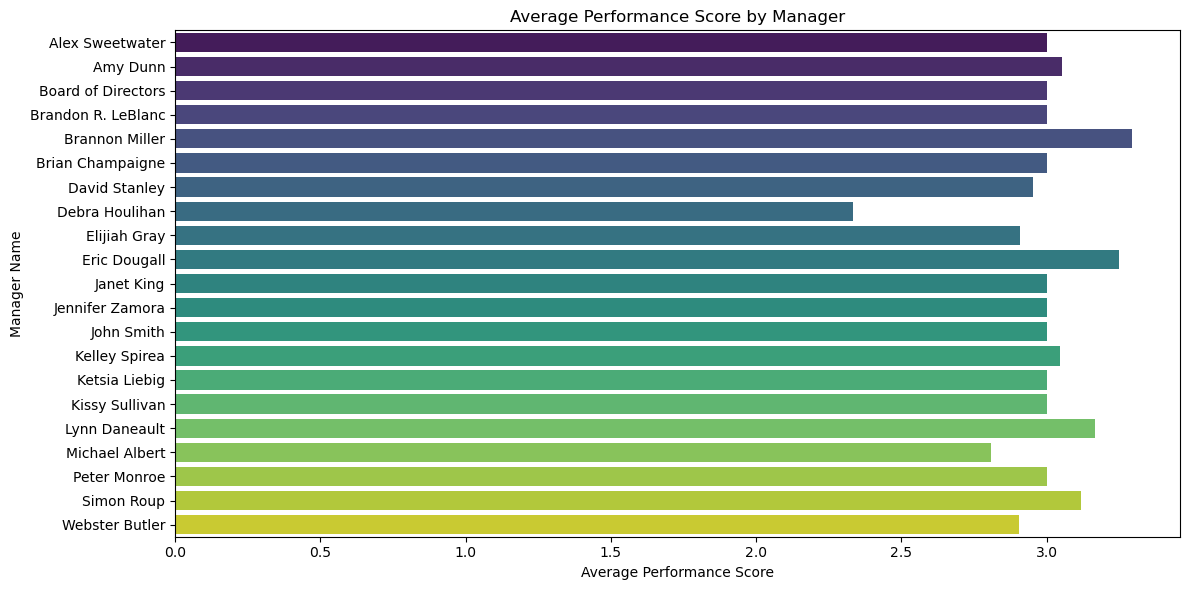

In [40]:
# Create a mapping for PerformanceScore to convert categorical values to numeric values
performance_mapping = {
    'Exceeds': 4,
    'Fully Meets': 3,
    'Meets': 2,
    'Needs Improvement': 1
}

# Map the PerformanceScore to numeric values in df DataFrame
df['PerformanceScoreNumeric'] = df['PerformanceScore'].map(performance_mapping)

# Dependency between direct supervisor and performance score
manager_performance = df[['ManagerName', 'ManagerID', 'PerformanceScoreNumeric']]

# Group by ManagerName and calculate the mean of PerformanceScoreNumeric for each manager
manager_perf_mean = manager_performance.groupby('ManagerName')['PerformanceScoreNumeric'].mean().reset_index()

# Data visualization using seaborn's barplot to plot the average performance score by manager
plt.figure(figsize=(12, 6))
sns.barplot(data=manager_perf_mean, x='PerformanceScoreNumeric', y='ManagerName', hue='ManagerName', palette='viridis', dodge=False, legend=False)
plt.title('Average Performance Score by Manager')
plt.xlabel('Average Performance Score')
plt.ylabel('Manager Name')
plt.tight_layout()
plt.show()

The bar plot indicates the average performance scores for each manager. Managers with higher average scores might indicate better performance among their direct reports, potentially suggesting effective management practices.

2. Best recruitment sources for employee retention

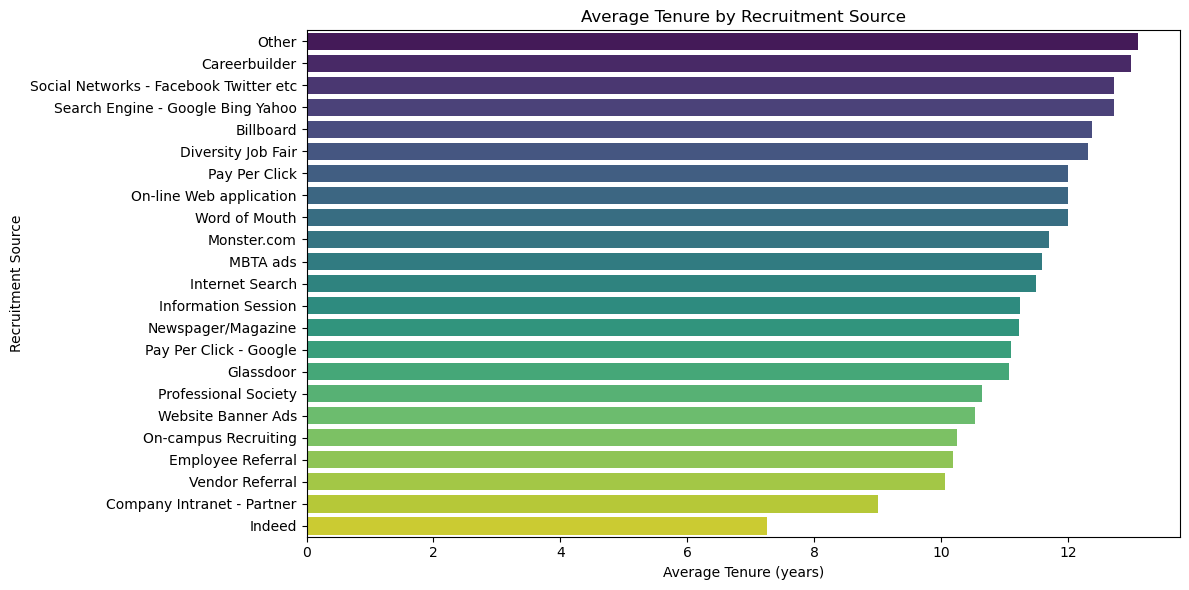

In [47]:
# Calculate length of service if not already present in the dataset
df['DateofHire'] = pd.to_datetime(df['DateofHire'], errors='coerce')

# Calculate Tenure
df['Tenure'] = 2024 - df['DateofHire'].dt.year

# Calculation of the average length of service for each recruitment source
recruitment_tenure = df.groupby('RecruitmentSource')['Tenure'].mean().reset_index()
recruitment_tenure = recruitment_tenure.sort_values(by='Tenure', ascending=False)

# Data visualization using seaborn's barplot to plot the average tenure by recruitment source
plt.figure(figsize=(12, 6))
sns.barplot(data=recruitment_tenure, x='Tenure', y='RecruitmentSource', hue='RecruitmentSource', palette='viridis', dodge=False, legend=False)
plt.title('Average Tenure by Recruitment Source')
plt.xlabel('Average Tenure (years)')
plt.ylabel('Recruitment Source')
plt.tight_layout()
plt.show()

The analysis shows which recruitment sources are associated with longer tenures. Recruitment sources with higher average lengths of service are preferable for employee retention.

3. Correlation between marital status and job satisfaction

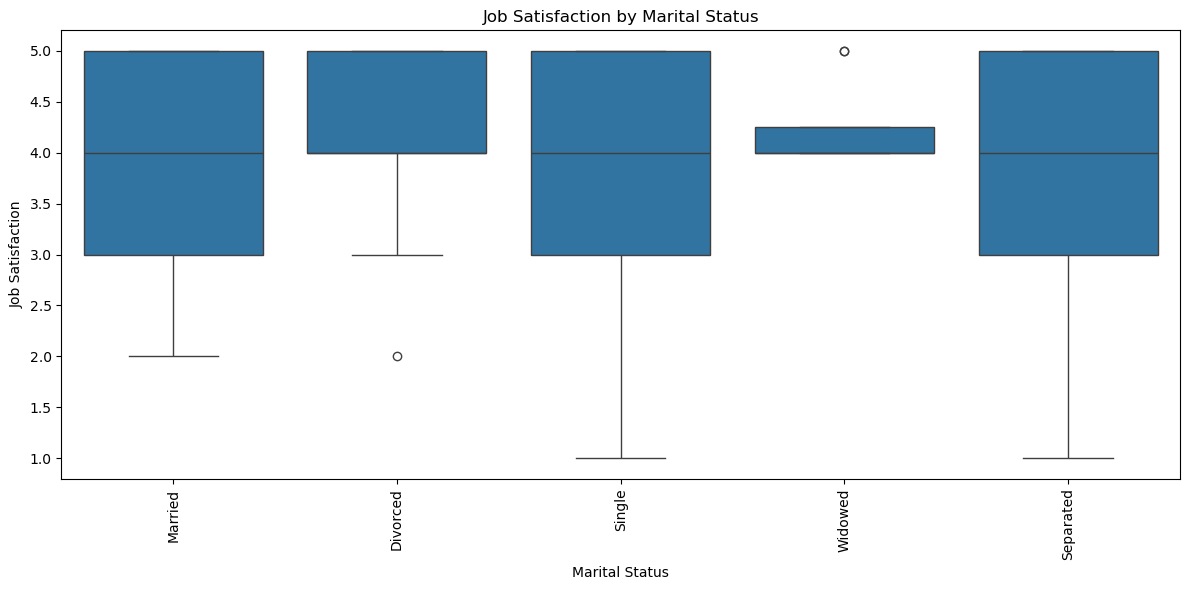

In [43]:
# Extract relevant columns for analysis
marital_satisfaction = df[['MaritalDesc', 'EmpSatisfaction']]

# Group by MartialDesc and calculate mean EmpSatisfaction
marital_satisfaction_mean = marital_satisfaction.groupby('MaritalDesc')['EmpSatisfaction'].mean().reset_index()

# Plotting the average EmpSatisfaction by MaritalDesc using a boxplot for better distribution visualization
plt.figure(figsize=(12, 6))
sns.boxplot(data=df, x='MaritalDesc', y='EmpSatisfaction')
plt.xticks(rotation=90)
plt.title('Job Satisfaction by Marital Status')
plt.xlabel('Marital Status')
plt.ylabel('Job Satisfaction')
plt.tight_layout()
plt.show()

The box plot displays the job satisfaction scores across different marital statuses.
The data indicates variability in job satisfaction based on marital status, with some groups, such as 'Married,' potentially showing higher satisfaction than others like 'Divorced.'

4. Age Structure of Employees

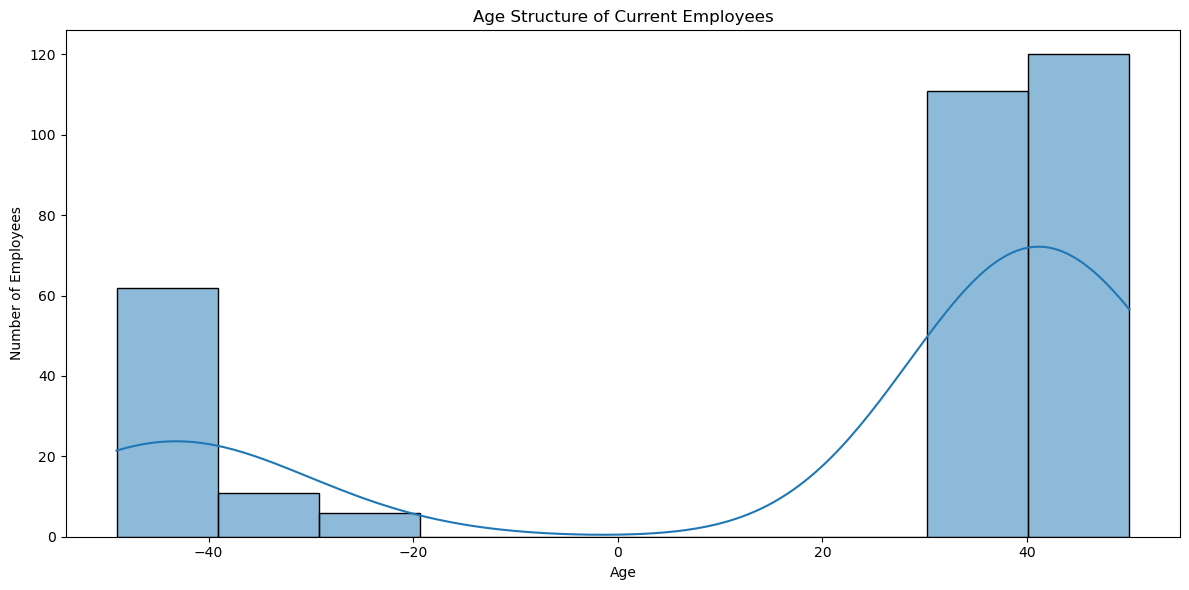

In [49]:
# Convert DOB to datetime, handling errors by coercing invalid parsing to NaT (Not a Time)
df['DOB'] = pd.to_datetime(df['DOB'], errors='coerce')

# Calculate the age of each employee by subtracting the year of birth from the current year (2024)
df['Age'] = 2024 - df['DOB'].dt.year

# Create a histogram plot to visualize the age distribution of current employees
plt.figure(figsize=(12, 6))
sns.histplot(data=df, x='Age', bins=10, kde=True)
plt.title('Age Structure of Current Employees')
plt.xlabel('Age')
plt.ylabel('Number of Employees')
plt.tight_layout()
plt.show()

The age structure of the currently employed workers shows that most employees are between 30 and 40 years old. There are fewer employees in the younger (20-30 years) and older (50-60 years) age ranges. This indicates a workforce primarily composed of individuals in their early to mid-career stages, with a relatively balanced but slightly younger demographic profile.

5. Special Projects and Age

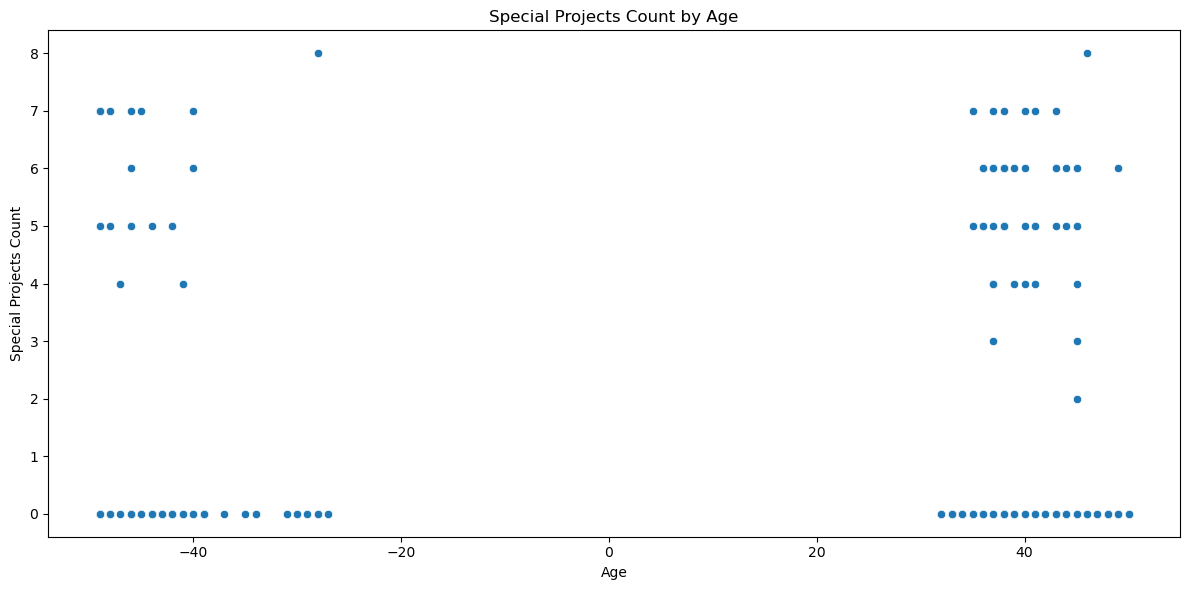

In [50]:
# Create a scatter plot to visualize the relationship between age and the number of special projects
plt.figure(figsize=(12, 6))  
sns.scatterplot(data=df, x='Age', y='SpecialProjectsCount') 
plt.title('Special Projects Count by Age') 
plt.xlabel('Age') 
plt.ylabel('Special Projects Count')  
plt.tight_layout() 
plt.show()  

Based on the scatter plot, there is no clear trend indicating that older employees work on more special projects than younger employees. The number of special projects assigned does not appear to significantly correlate with age.